<a href="https://colab.research.google.com/github/adrianpabon/Decision-Trees-and-Random-Forest/blob/main/proy_final_randomforesy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('adult.data')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
# Le pongo nombre a las columnas
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation', 'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df.columns = cols

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
#veamos la forma del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
#Procesamiento de datos
X = df.drop(['income'], axis=1)
y = df['income']

In [14]:
#Importamos la libreria para dividir los datos
from sklearn.model_selection import train_test_split

#Dividimos los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [16]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [18]:
# Importamos el encoder
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [19]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race','sex','native-country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
21385,32,1,732102,1,13,1,1,1,1,1,0,0,40,1
19749,23,1,72887,2,9,1,2,2,2,1,0,0,1,2
1216,33,2,163003,2,9,2,3,1,2,2,0,0,41,3
30048,56,3,187873,3,14,2,4,3,1,2,0,0,40,1
23077,50,1,43764,4,16,3,5,4,1,1,15024,0,50,1


In [33]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [34]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [35]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf =accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf =accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

El accuracy en train es: 0.9876272376272376
El accuracy en test es: 0.8530917280917281


In [36]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

age               0.168043
fnlwgt            0.167393
capital-gain      0.113522
relationship      0.093399
education-num     0.082826
hours-per-week    0.081475
occupation        0.076571
marital-status    0.065368
education         0.038496
capital-loss      0.035317
workclass         0.035129
native-country    0.016510
race              0.013892
sex               0.012058
dtype: float64

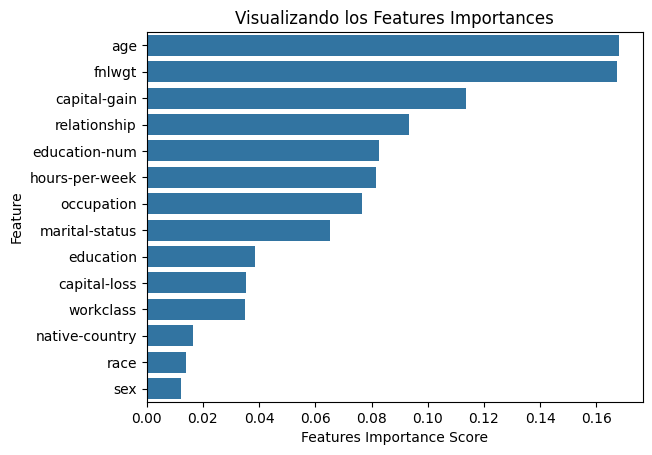

In [37]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores , y = features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

In [38]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7395
        >50K       0.76      0.58      0.66      2373

    accuracy                           0.85      9768
   macro avg       0.82      0.76      0.78      9768
weighted avg       0.85      0.85      0.85      9768

